## X-ray catalog
* Salvato+2018
  - paper: https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.4937S/abstract
  - vizier: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/MNRAS/473/4937

In [3]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

key = "J/MNRAS/473/4937"
tables = Vizier.get_catalogs(key)
tables

TableList with 2 tables:
	'0:J/MNRAS/473/4937/2rxswg' with 20 column(s) and 132254 row(s) 
	'1:J/MNRAS/473/4937/xmmslew2' with 22 column(s) and 19141 row(s) 

In [4]:
rosat = tables[0].to_pandas()
# xmm = tables[1].to_pandas()

/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column '_2MASS' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'Gaia' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


## filtering

In [8]:
rosat.columns

Index(['_2RXS', 'RAJ2000', 'DEJ2000', 'SrcFlux', 'ALLWISE', 'W1mag', 'W2mag',
       'W3mag', 'W4mag', 'SepW-2RXS', 'MatchFlag', '_1RXS', '_2MASS', 'Jmag',
       'Hmag', 'Kmag', 'Gaia', 'pmRA', 'pmDE', '__Gmag_'],
      dtype='object')

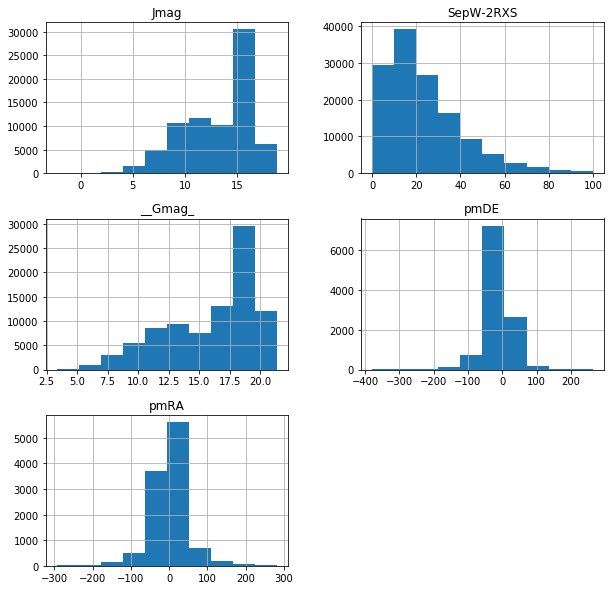

In [18]:
axs = rosat[['Jmag', '__Gmag_', 'SepW-2RXS', 'pmRA', 'pmDE']].hist(figsize=(10,10))

In [24]:
# bright = rosat.__Gmag_ < 12
bright = rosat.Jmag < 12
best_match = rosat.MatchFlag==1 #most probable match, if existing
close_match = rosat['SepW-2RXS'] < 5 #Separation between X-ray source and AllWISE candidate counterpart
nearby = (abs(rosat.pmRA) > 100) | (abs(rosat.pmDE) > 100)

short_list = rosat[bright & best_match & close_match & nearby]
short_list

,_2RXS,RAJ2000,DEJ2000,SrcFlux,ALLWISE,W1mag,W2mag,W3mag,W4mag,SepW-2RXS,MatchFlag,_1RXS,_2MASS,Jmag,Hmag,Kmag,Gaia,pmRA,pmDE,__Gmag_
29,b'2RXS J201344.9-874927',303.43750,-87.82428,1.101200e-12,b'J201346.48-874924.0',7.102,7.125,7.116,7.042,3.502237,1,b'',1.126870e+09,7.452,7.207,7.127,6.341581e+18,77.959,-121.076,8.281
896,b'2RXS J050349.8-793022',75.95766,-79.50628,1.444300e-12,b'J050349.85-793022.3',7.906,7.956,7.909,7.778,0.234395,1,b'J050349.6-793024',7.041861e+08,8.404,8.088,7.983,4.624077e+18,90.679,174.371,9.399
1970,b'2RXS J212123.9-665456',320.34975,-66.91571,9.673100e-12,b'J212124.66-665458.4',6.329,6.281,6.335,6.206,4.695739,1,b'J212124.3-665455',1.094966e+09,7.027,6.503,6.400,6.400162e+18,95.656,-101.201,8.657
2059,b'2RXS J172013.0-700245',260.05448,-70.04607,1.978000e-11,b'J172012.58-700245.4',5.056,4.898,5.043,5.021,2.519795,1,b'J172012.8-700246',1.022424e+09,5.440,5.131,5.042,5.811053e+18,-46.983,-197.716,6.392
2065,b'2RXS J171746.9-693425',259.44556,-69.57387,2.003500e-12,b'J171747.08-693423.8',8.512,8.516,8.455,8.324,2.256667,1,b'J171746.7-693426',1.022380e+09,8.901,8.664,8.582,5.811104e+18,-28.760,-109.957,9.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88605,b'2RXS J074953.7+862150',117.47393,86.36398,4.213900e-12,b'J074952.74+862153.6',6.457,6.406,6.446,6.421,3.449177,1,b'J074954.2+862151',5.785032e+08,6.781,6.561,6.481,1.151854e+18,-68.476,-136.337,7.711
88626,b'2RXS J064120.0+821603',100.33353,82.26755,1.123100e-11,b'J064119.25+821600.8',7.278,7.340,7.289,7.162,2.820032,1,b'J064120.3+821603',1.163115e+09,7.872,7.506,7.376,1.143477e+18,43.472,-151.207,9.054
94235,b'2RXS J202701.1-174732',306.75474,-17.79236,5.450400e-13,b'J202701.37-174729.7',6.928,6.949,6.947,6.904,4.369350,1,b'',1.274458e+09,7.545,7.117,7.005,6.861110e+18,16.885,-106.588,8.770
96626,b'2RXS J220417.7+023620',331.07389,2.60566,3.211000e-12,b'J220417.70+023621.7',6.633,6.670,6.678,6.564,1.424378,1,b'J220417.6+023619',1.097705e+09,7.392,6.850,6.684,2.683284e+18,144.630,31.933,8.996


## save

In [35]:
# import pandas as pd

# short_list = short_list.apply(lambda x: pd.to_numeric(x, errors='ignore'))
short_list.Gaia = short_list.Gaia.astype(int)
short_list.to_csv('../data/rosat.txt', sep=',', index=False)